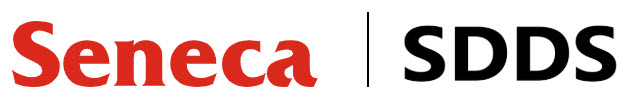

# **Introduction to Data Mining**
# **Workshop2**

## **Part Two: Introduction to Data Mining-Clarifying the Concepts**
Answer the following questions using your own words.

#### Question 1. Name the seven phases of the data science methodology (DSM).


**>>>>>Write your answer here <<<<<**

Ans. DSM is an interative and adaptive process
1. The problem-understanding phase includes writing the project goals transform them into forms which can be solved by using data science techniques.
2. The data preparation phase consists of cleaning data and making it ready to use in order to apply algorithms or techniques to acheive project objectives.
3. Exploratory Data Analysis phase: once the data cleaning process is completed we will explore the data and get basic informations from them.
4. Setup phase: almost ready to start modelling the data.
5. Modelling phase consist of applying machine learning algorithms to get meaningful relations which were hidden in the data.
6. Evaluation phase includes evaluation our model, this phase mainly deals with checking our model, whether it is performing well or we need work more on the model.
7. Deployment phase: when the model is ready and ready to report the management.









#### Question 2. Explain how the DSM is adaptive.

**>>>>>Write your answer here <<<<<**

Data science methodology is adaptive because technology is constantly evovling, it is adaptive as we can anytime change the objectives of the project, we can adapt new alogirthms according to the problems evolved.There may be many uncertain data and raw data which needs cleaning to get basic information everytime when we are evaluating the model.






#### Question 3. Describe how the DSM is iterative.

**>>>>>Write your answer here <<<<<**

Assuming a situation where we have already identified project objective, cleaned the data, during evaluation process, while applying algorithms to  the data, if we came across to issue where we need to revaluate project objectives or work more on data processing, we can work on that and continue with the model until it's ready for deployment. This situation explains how DSM is iterative.









#### Question 4. Tuples/records with missing values for some attributes are common in real-world data. Describe various methods for handling this problem.

**>>>>>Write your answer here <<<<<**

Ans. Records with missing values is an example of dirty data, the cleaner the data the more accurate the information, to get more accuracy, one can fill the missing values or remove it to get the consistency, integrate data from multiple sources, reduce the data to the extent where it produce to the same analysis. Some methods to deal with noisy data are the Bining method: sorting the data into N intervals and smooth it into bin means, bin boundaries.
2. Clustering: finding and removing them.
3. Regression: cleaning by means of regression methods(linear, multiple).









## **Part Three: Python – Introduction to Pandas**



In [185]:
# Loading neccesary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import  stats
import warnings





In [116]:
warnings.filterwarnings('ignore')
plt.style.use('default')

In [117]:
%matplotlib inline
# without this the plots would be opened  in a new window (not browser)
# with this instruction plots will be included in the notebook

In [118]:

# Use %config InlineBackend.figure_format = 'retina'
# after %matplotlib inline to render higher resolution images
%config InlineBackend.figure_format = 'retina'

In [119]:
# If you wish to use Google colab, the following code will allow you to mount your Google Drive. Otherwise, comment on the following lines.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [120]:
# To print multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)


In [121]:

#Reading the data from google drive
data=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/olympics.csv',index_col=0,skiprows=1)
#Print that data imported successfully
print("Data imported successfully")




Data imported successfully


**Task**.  Explain the below Python Code.

In [122]:




### Explain the below Python Code.
for col in data.columns:
  if col[:2] == '01':
    data.rename(columns={col: 'Gold' + col[4:]}, inplace=True)
  if col[:2] == '02':
    data.rename(columns={col: 'Silver' + col[4:]}, inplace=True)
  if col[:2] == '03':
    data.rename(columns={col: 'Bronze' + col[4:]}, inplace=True)
  if col[:1] == '№':
    data.rename(columns={col: '#' + col[1:]}, inplace=True)
names_ids = data.index.str.split('\s\(')  # split the index by '('
# the [0] element is the country name (new index)
data.index = names_ids.str[0]
# the [1] element is the abbreviation or ID (take first 3 characters from that)
data['ID'] = names_ids.str[1].str[:3]
data = data.drop('Totals')


### >>>>>Answer here<<<<<

for col in data.columns runs the loop through each column from the file, and it checks the condition if starting two characters are equivalent to '01','02','03''N^0' then rename those columns with Gold,Silver and Bronze or # and keep everything else the same.

After completing the iteration names_ids= will split the index by '('
data['ID'] takes the first 3 characters from that [:3] denotes that.
The last line drop "Totals" row from the csv file.







**Task**. What is the  data.shape value?

In [123]:
#Write your answer and code here
shape = data.shape
print(shape)
#The data.shape value refers to the dimensions of a data structure in a programming context.
#In this example value of data.shape is (146,16)

(146, 16)


**Task**. How many rows are in the olympics.csv data set? How many columns are in the olympics.csv   dataset?

In [124]:


#Write your answer and code here
print('Number of rows = %d' % (data.shape[0]))
print('Number of columns = %d' % (data.shape[1]))
#There are 146 number of rows and 16 number of columns in olympics.csv.

Number of rows = 146
Number of columns = 16


**Task**. Which country has won the most gold medals in summer games?

In [125]:
#Write your answer and code here
#idxmax returns the index with highest number in the particular column
#The country with most gold medals=United States
print(data['Gold'].idxmax())


United States


**Task**. Which country had the biggest difference between their summer and winter gold medal counts?

In [126]:
#Write your answer and code here
print((data['Gold'] - data['Gold.1']).idxmax())



United States




**Task**. Which country has the biggest difference between summer and winter gold medals relative to their total gold medal counts?

$$\frac{SummerGoldMedal - WinterGoldMedal}{TotalGoldMedal}$$

In [127]:

#Write your answer and code here
#The biggest difference between summer and winter gold medals relative to their total gold medal
print(((data['Gold']-data['Gold.1'])/(data['Gold']+data['Gold.1'])).idxmax())

Algeria


## **Part Four: Data Preprocessing**


**Task**. Import the Pandas library package and load the bank marketing dataset (`bank_marketing_train.csv`) using the read_csv function.

In [128]:

#Write your answer and code here
## Make sure you connect to Your Google Drive

bank_data=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/bank_marketing_train.csv')

**Task**. Determine the number of rows in the dataset, derive an index field, and add it to the data set.

In [129]:


#Write your answer and code here
print('Number of rows = %d' % (bank_data.shape[0]))

Number of rows = 32951


**Task**. For the `pdays` field, change the field value 999 to the appropriate code for missing values. In python, we use `numpy.NaN`.

In [130]:
#Write your answer and code here

#first tasks of converting missing values to Nan
data=bank_data['pdays'].replace(999,np.NaN)
print(data)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
32946   NaN
32947   NaN
32948   NaN
32949   NaN
32950   NaN
Name: pdays, Length: 32951, dtype: float64


**Task**. For the education field, reexpress the field values as the numeric values using the table shown below.

| Categorical Value | Numeric Value |
|---|---|
| illiterate | 1 |
| basic.4y | 2 |
|  basic.6y |  3 |
|basic.9y	| 4 |
|high.school|	5|
|professional.course|	5|
|university.degree	|16|
|unknown	|Missing value (`numpy.NaN`)|


In [158]:

#Write your answer and code here
# Replace the values in the 'education' column using the mapping
bank_data['education'] = bank_data['education'].replace({'illiterate': 1,
    'basic.4y': 2,
    'basic.6y': 3,
    'basic.9y': 4,
    'high.school': 5,
    'professional.course': 5,
    'university.degree': 16,
    'unknown': np.NaN})
print(bank_data['education'])


0         2.0
1         5.0
2         5.0
3         3.0
4         4.0
         ... 
32946     5.0
32947     5.0
32948    16.0
32949     5.0
32950     5.0
Name: education, Length: 32951, dtype: float64


**Task**. Standardize the field age, and store the new field in `age_z`. Then,  Print out a list of the first ten records, including the variables `age` and `age_z`.



In [155]:

#Write your answer and code here
bank_data['age_z']=(bank_data.age-bank_data.age.mean())/bank_data.age.std()
print(bank_data[['age', 'age_z']].head(10))

   age     age_z
0   56  1.536859
1   57  1.632918
2   37 -0.288268
3   40 -0.000090
4   45  0.480206
5   59  1.825037
6   24 -1.537040
7   25 -1.440980
8   41  0.095969
9   29 -1.056743


"\n#Write your answer and code here\n# Create a StandardScaler object\nscaler = StandardScaler()\nbank_data['age_z'] = scaler.fit_transform(bank_data[['age']])\nprint(bank_data[['age', 'age_z']].head(10))\n"

**Task**. Obtain a list of all outliers records according to the field age_z. Print out a listing of the ten largest age_z values. Use the following condition to determine the extreme outlier values for standardized field age_z:   'age_z > 3 | age_z < ‐3'

In [180]:
#Write your answer and code here
outlier_condition=(bank_data['age_z'] > 3) | (bank_data['age_z'] < -3)
#list of outlier records
list_outliers=bank_data[outlier_condition].sort_values(by=['age_z'],ascending=False)
print(list_outliers[:10])


       age    job   marital  education  default housing loan   contact  month  \
30769   98  other   married        2.0  unknown     yes   no  cellular     10   
30766   98  other   married        2.0  unknown     yes   no  cellular     10   
22291   95  other  divorced        3.0       no      no   no  cellular      3   
31139   94  other   married        4.0       no      no   no  cellular     11   
32361   92  other   married        NaN       no      no  yes  cellular      8   
31794   92  other  divorced        NaN  unknown      no   no  cellular      5   
31730   92  other   married        NaN       no     yes   no  cellular      5   
32377   92  other   married        NaN       no      no  yes  cellular      8   
30437   91  other   married       16.0       no      no  yes  cellular      9   
30428   91  other   married       16.0       no     yes  yes  cellular      9   

      day_of_week  duration  campaign  pdays  previous     poutcome  \
30769         fri       272         2

**Task**. For the job field,  replace the job descriptions with less than $5%$ of the records with a job description other.
For example, the retired job description has $4.2336%$, so this job description needs to be replaced with other.
You can use value counts to produce the number of observations for each job description. Dividing the values counts by the number of total rows

```python
bank_train['job']).value_counts() / bank_train.shape[0]
```

In [184]:
#Write your answer and code here
job_counts = bank_data['job'].value_counts()
replacement= job_counts[job_counts / len(bank_data) < 0.05].index.tolist()
# Replace job descriptions with "other"
bank_data['job'].replace(replacement, 'other',inplace=True)
print(bank_data['job'])

0              other
1           services
2           services
3             admin.
4           services
            ...     
32946          other
32947    blue-collar
32948          other
32949     technician
32950          other
Name: job, Length: 32951, dtype: object


**Task**. For the variable month, change the field values to 1–12, but keep the variable categorical.

In [164]:
#Write your answer and code here
bank_data['month'] = bank_data['month'].replace({'jan': 1,'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11,
    'dec': 12})
print(bank_data['month'])

0         5
1         5
2         5
3         5
4         5
         ..
32946    11
32947    11
32948    11
32949    11
32950    11
Name: month, Length: 32951, dtype: int64


**Task**. Do the following for the campaign field.

1. Standardize the variable and store it in `campaign_z` field.
2. Identify how many outliers there are and identify the most extreme outlier. Use the following condition to determine the extreme outlier values for standardized field `campaign_z`: `campaign _z > 3 | campaign_z < ‐3`


In [182]:
#Write your answer and code here
#standardize the variable

bank_data['campaign_z'] =((bank_data.campaign-bank_data.campaign.mean())/(bank_data.campaign.std()))
outliers = bank_data[(bank_data['campaign_z'] > 3) | (bank_data['campaign_z'] < -3)]
extreme_outlier = outliers['campaign_z'].min()
print("Number of outliers:", len(outliers))
print("Most extreme outlier:", extreme_outlier)
print(outliers[['campaign','campaign_z']])



Number of outliers: 690
Most extreme outlier: 3.0895101187182785
       campaign  campaign_z
1744         11    3.089510
1780         12    3.455493
2070         11    3.089510
2071         11    3.089510
2092         12    3.455493
...         ...         ...
28617        12    3.455493
29499        15    4.553440
30313        12    3.455493
30327        13    3.821475
32061        11    3.089510

[690 rows x 2 columns]


### **The workshop report should include:**
- (a)	Complete this declaration by adding your names:
We, Apeksha Nanda, Saloni Kamboj, declare that the attached assignment is our own work in accordance with the Seneca Academic Policy. We have not copied any part of this assignment, manually or electronically, from any other source, including websites, unless specified as references. We have not distributed our work to other students.

- (b)	Specify what each member has done towards the completion of this work:

| | Name| Task(s) |
|---|---|---|
|1| Apeksha Nanda   |   Part 2,3,4  |
|2| Saloni Kamboj    |  Part 2,3,4  |